# Posterior Approximation for a Two interactions model for graph

We can express a  Two interactions dedicated to graphs as an exponential model :

$$P(y | n \theta) = exp[\theta_{l1} t_{edge\_l1}(y) + \theta_{l2} t_{edge\_l2}(y) + \theta_{l12} t_{edge\_l1\neq l2}(y) ] $$

Where $y$ is a **graph realisation (an observation)**
* $t[y] = [ t_{edge\_l1}(y), t_{edge\_l2}(y), t_{edge\_l1\neq l2}(y)]$ the vector of sufficient statistics: $t_{edge\_l1}(y) = edge\_l1\_count(y),t_{edge\_l2}(y) = edge\_l2\_count(y)$

And then express the posterior distribution of $\theta$ for a  Two interactions:

$$P(\theta | y, n) \propto P(y | n, \theta) p(\theta) = exp[\theta_{l1} t_{edge\_l1}(y) + \theta_{l2} t_{edge\_l2}(y) + \theta_{l12} t_{edge\_l1\neq l2}(y) ] P(\theta)$$


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from statsmodels.graphics.tsaplots import plot_acf

from math import exp

In [3]:
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    if not isinstance(data, list):
        data = data['posteriors']
    theta_l1 = [d[0] for d in data]
    theta_l2 = [d[1] for d in data]
    theta_l12 = [d[2] for d in data]

    
    data_frame = pd.DataFrame({'theta_l1': theta_l1,
                               'theta_l2': theta_l2,
                               'theta_l12': theta_l12
                              })
    
    return data_frame


def summary(data):
    col_names = data.columns.values
    for i in [25,50,75]:
        print("========== Q{} ==========".format(i))
        for _, param_name in np.ndenumerate(col_names):
            q = np.percentile(data[param_name], i)
            print("Q{} for {} parameter {}".format(i, param_name, q))
    
    
def plot_marginals(data_abc, burn_in=0, by=1):
    
    col_names = data_abc.columns.values
    
    fig, axs = plt.subplots(len(col_names), 2, figsize=(14,25))
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        # Sample parameter
        params = data_abc[param_name].tolist()[burn_in::by]

        # Distribution
        sns.distplot(params, axlabel="{} distribution ABC".format(param_name), ax=axs[i, 0])

        # Path
        axs[i, 1].plot(range(len(params)), params)
        axs[i, 1].set(xlabel='iterations', ylabel='{} parameter ABC'.format(param_name))

def plot_dist(data, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    theta_l1 = data['l1'].tolist()[burn_in::by]
    theta_tl2 = data['l2'].tolist()[burn_in::by]
    theta_tl12 = data['l12'].tolist()[burn_in::by]
    
    data_sampled = pd.DataFrame({'theta_l1': theta_l1,
                                 'theta_l2': theta_l2,
                                 'theta_l12': theta_l12})
    
    g = sns.PairGrid(data_sampled, height=5)
    g = g.map_upper(plt.scatter)
    g = g.map_lower(sns.kdeplot, cmap="Blues_d")
    g = g.map_diag(sns.kdeplot, lw=3, legend=False)


def autocor(data_abc, burn_in=0, by=1):

    col_names = data_abc.columns.values
    fig, axs = plt.subplots(len(col_names), 1, sharex='col', sharey='row', figsize=(14,21)) 
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        params = data_abc[param_name].tolist()[burn_in::by]
    
        plot_acf(params, ax=axs[i])
        axs[i].set_title("Autocorrelation for {} parameter".format(param_name))

### Experimentation #1
* sample size : $size=10$ nodes (for a complete graph)
* $theta_0 = [0.1, 0.1, 0.1]$
* $y \sim  Metropolis\_Hasting(\theta_0, iter=1000)$
* $\Delta=[0.05,0.05, 0.05]$
* Number of samples: $n=10000$
* Shadow chain length: $n_{shadow} = 100$

In [4]:
FILE_NAME_1 = 'assets/exp1.json'
data1 = extract_from_file(FILE_NAME_1)

In [5]:
summary(data1)

========== Q25 ==========
Q25 for theta_l1 parameter -0.39585015555998343
Q25 for theta_l2 parameter -0.46575561987311914
Q25 for theta_l12 parameter 0.023149154939341603
========== Q50 ==========
Q50 for theta_l1 parameter 0.13180500371240336
Q50 for theta_l2 parameter 0.1886352579463396
Q50 for theta_l12 parameter 0.10555410228143004
========== Q75 ==========
Q75 for theta_l1 parameter 0.6182740083670354
Q75 for theta_l2 parameter 0.668760781220957
Q75 for theta_l12 parameter 0.19635738556080612


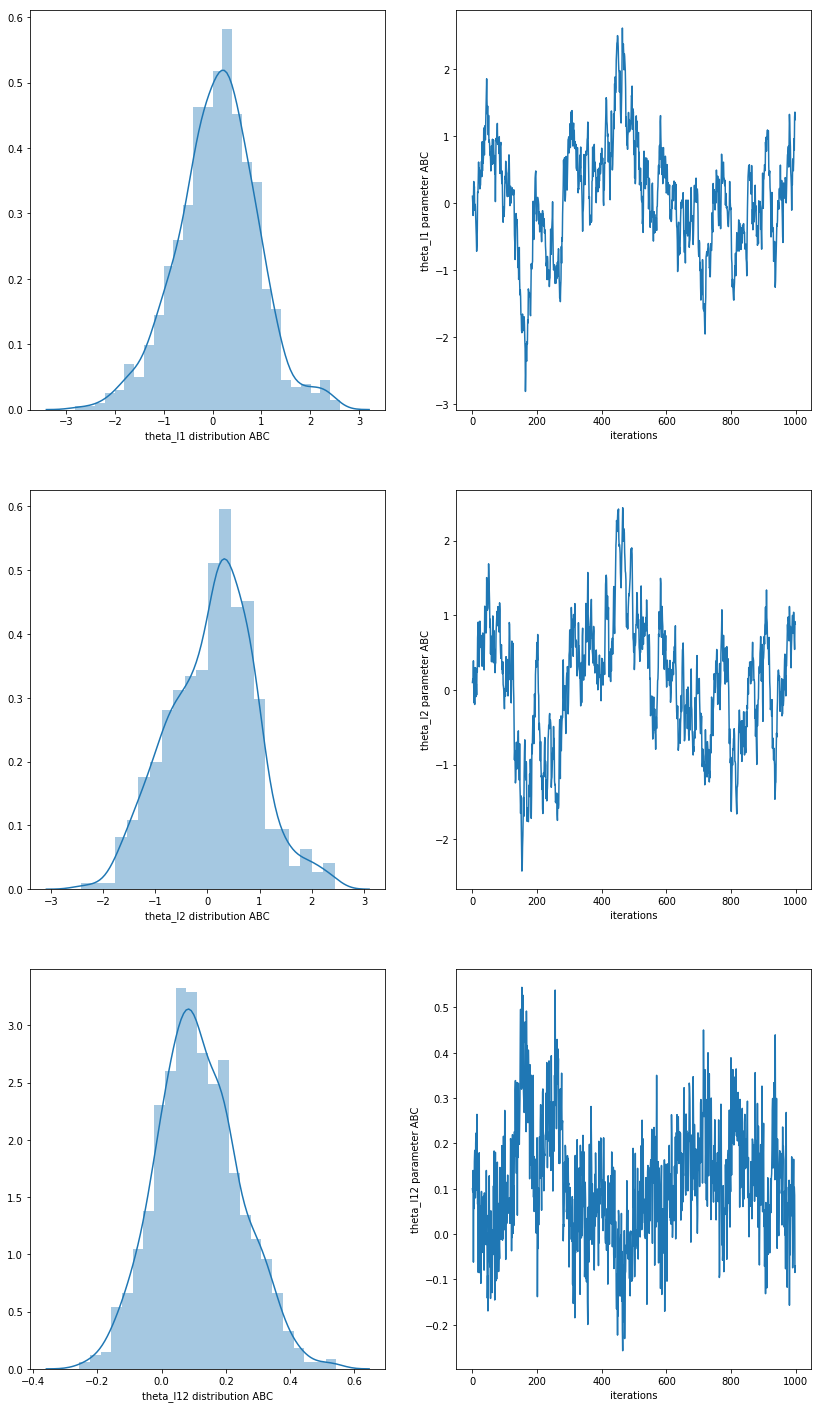

In [6]:
plot_marginals(data1, by=10)
# plt.savefig('post_interactions_marginals.pdf')

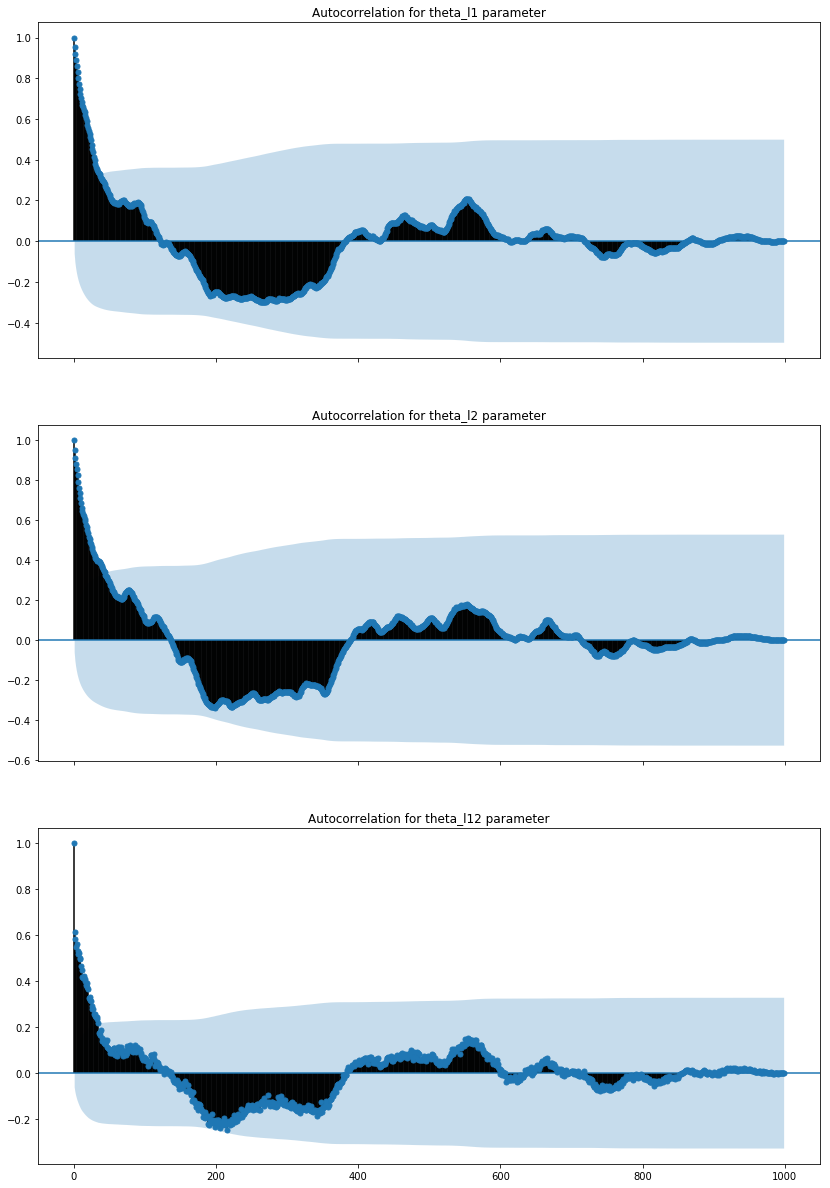

In [7]:
autocor(data1, by=10)

### Experimentation #2
* sample size : $size=10$ nodes (for a complete graph)
* $\theta_0 = [1, -1, 1]$
* $y \sim  Metropolis\_Hasting(\theta_0, iter=100)$
* $\Delta=[0.05,0.05, 0.05]$
* Number of samples: $n=1000$
* Shadow chain length: $n_{shadow} = 100$

In [8]:
FILE_NAME_2 = 'assets/exp2.json'
data2 = extract_from_file(FILE_NAME_2)

In [9]:
summary(data2)

========== Q25 ==========
Q25 for theta_l1 parameter -0.005698609041903788
Q25 for theta_l2 parameter 0.19965390878854125
Q25 for theta_l12 parameter -0.0005754843355515512
========== Q50 ==========
Q50 for theta_l1 parameter 0.47273765470961715
Q50 for theta_l2 parameter 0.5269503295852445
Q50 for theta_l12 parameter 0.06203061035851344
========== Q75 ==========
Q75 for theta_l1 parameter 0.7858930156114846
Q75 for theta_l2 parameter 0.7554565128260446
Q75 for theta_l12 parameter 0.13284374775686958


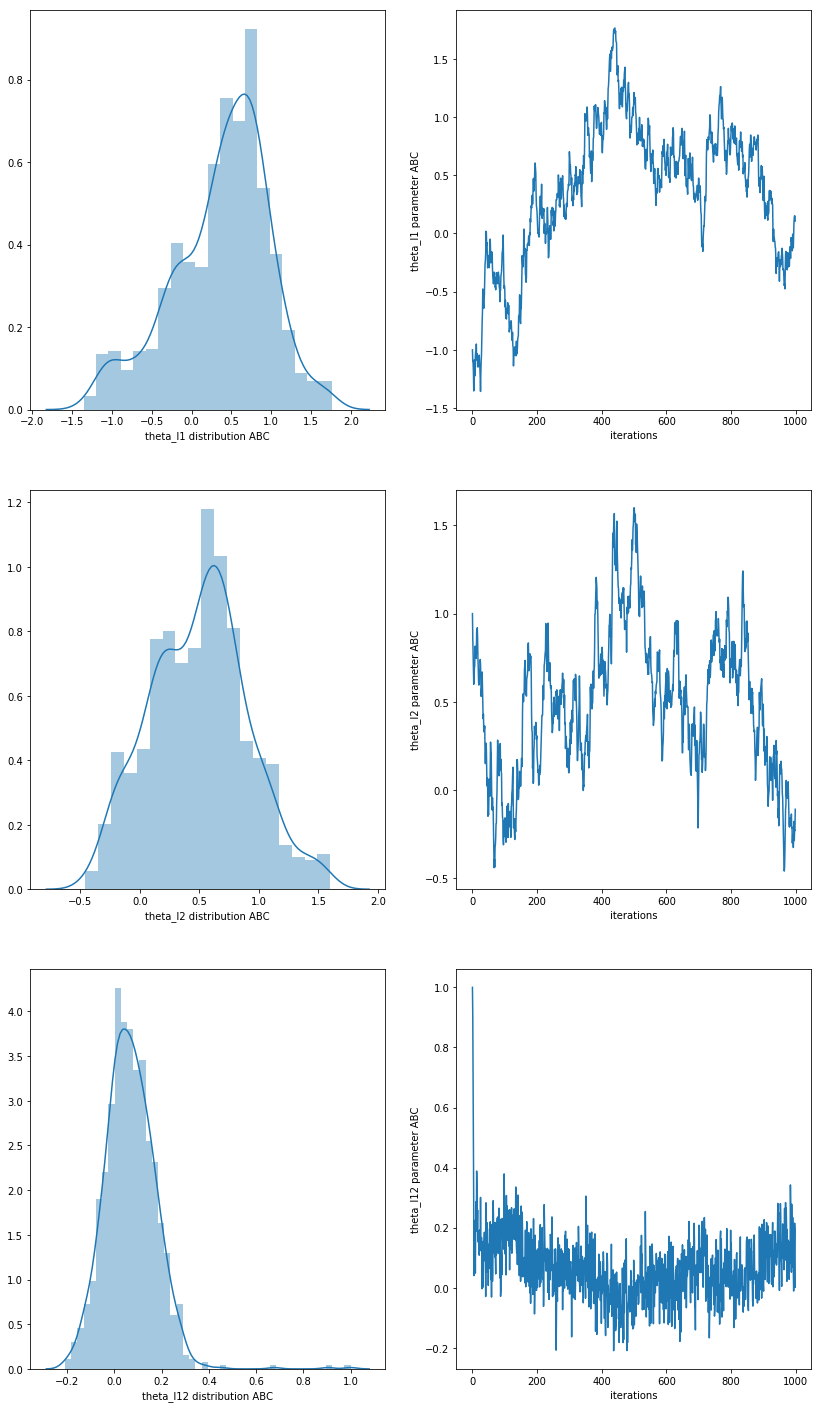

In [10]:
plot_marginals(data2)

### Experimentation #3
* sample size : $size=10$ nodes (for a complete graph)
* $\theta_0 = [1, -1, 0]$
* $\theta_{perfect} = [0, 0, 0]$
* $y \sim  Metropolis\_Hasting(\theta_{perfect}, iter=1000)$
* $\Delta=[0.05,0.05, 0.05]$
* Number of samples: $n=30000$
* Shadow chain length: $n_{shadow} = 10$

In [11]:
FILE_NAME_3 = 'assets/exp3.json'
data3 = extract_from_file(FILE_NAME_3)

In [12]:
summary(data3)

========== Q25 ==========
Q25 for theta_l1 parameter -1.2532143093195733
Q25 for theta_l2 parameter -1.3530869155324168
Q25 for theta_l12 parameter 0.04100762960112105
========== Q50 ==========
Q50 for theta_l1 parameter -0.6503805584062199
Q50 for theta_l2 parameter -0.7652510270708612
Q50 for theta_l12 parameter 0.12011980402094707
========== Q75 ==========
Q75 for theta_l1 parameter -0.22490915431915104
Q75 for theta_l2 parameter -0.22962514254311156
Q75 for theta_l12 parameter 0.22773040066901656


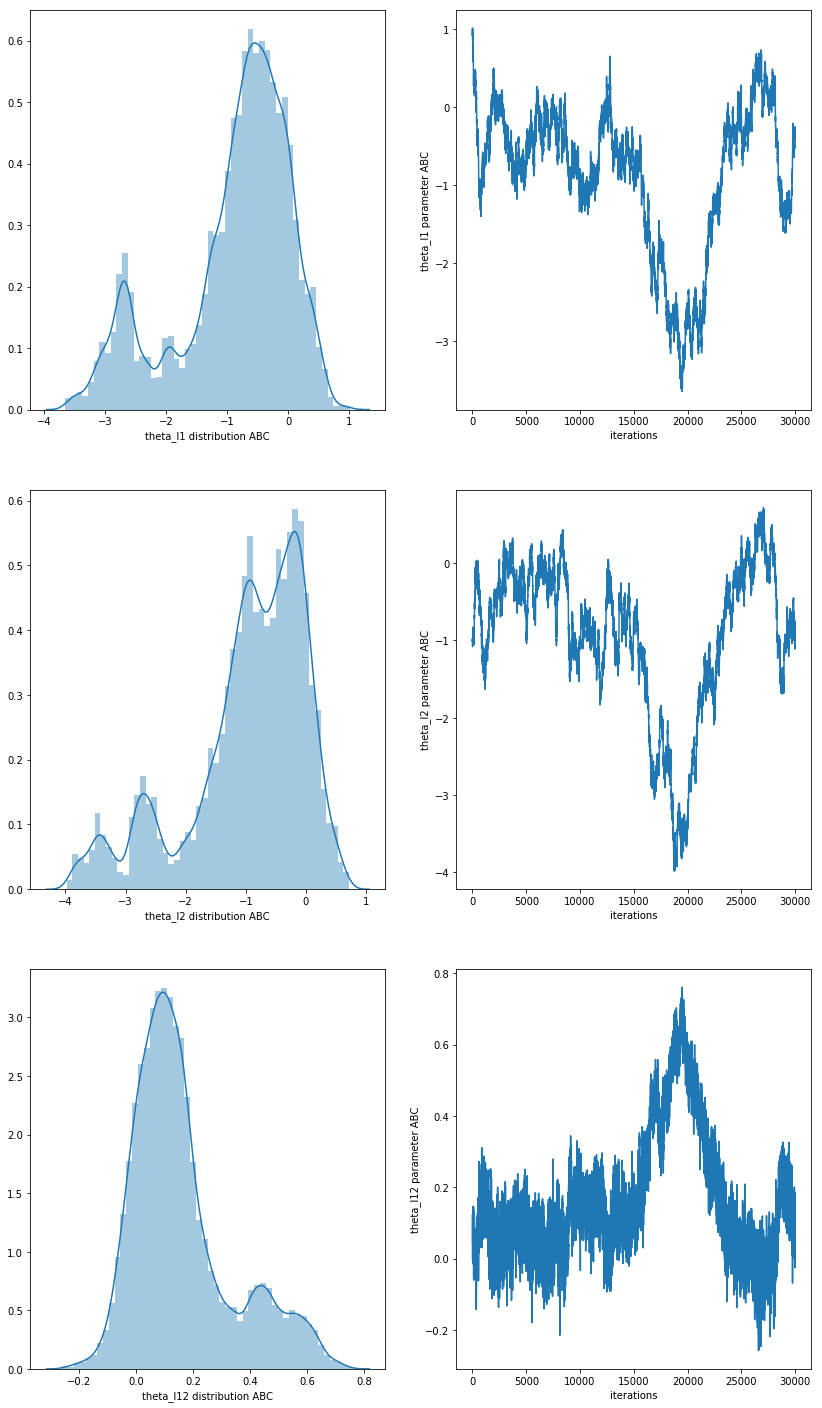

In [13]:
plot_marginals(data3)

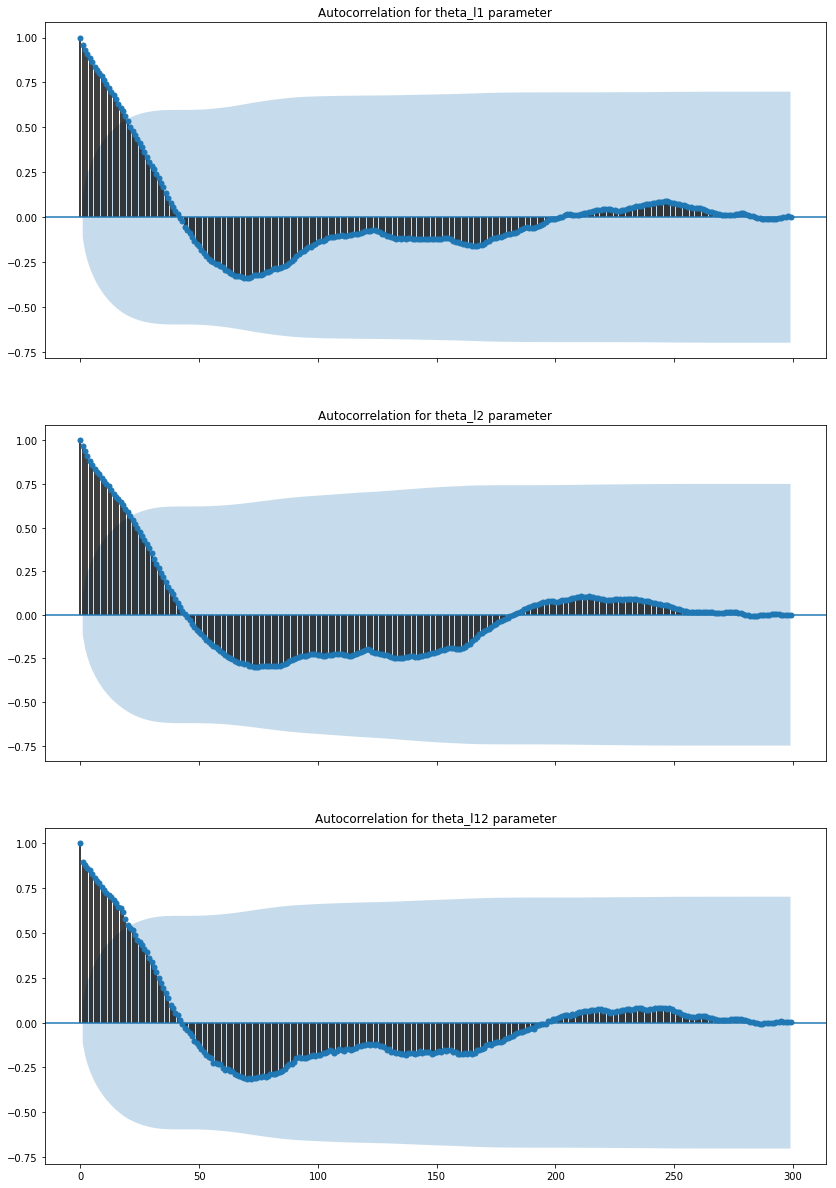

In [14]:
autocor(data3, by=100)

### Experimentation #4
* sample size : $size=10$ nodes (for a complete graph)
* $\theta_0 = [0.1, 0.1, 0.1]$
* $y \sim  Metropolis\_Hasting(\theta_0, iter=1000)$
* $\Delta=[0.05,0.05, 0.05]$
* Number of samples: $n=50000$
* Shadow chain length: $n_{shadow} = 100$

In [15]:
FILE_NAME_4 = 'assets/exp4.json'
data4 = extract_from_file(FILE_NAME_4)

In [16]:
summary(data4)

========== Q25 ==========
Q25 for theta_l1 parameter -0.9046145532880066
Q25 for theta_l2 parameter -0.9289983371633411
Q25 for theta_l12 parameter 0.06443068598235949
========== Q50 ==========
Q50 for theta_l1 parameter -0.22459422368778809
Q50 for theta_l2 parameter -0.23724255940677166
Q50 for theta_l12 parameter 0.1583890816610604
========== Q75 ==========
Q75 for theta_l1 parameter 0.3398571669061362
Q75 for theta_l2 parameter 0.3622128967262052
Q75 for theta_l12 parameter 0.261273922062052


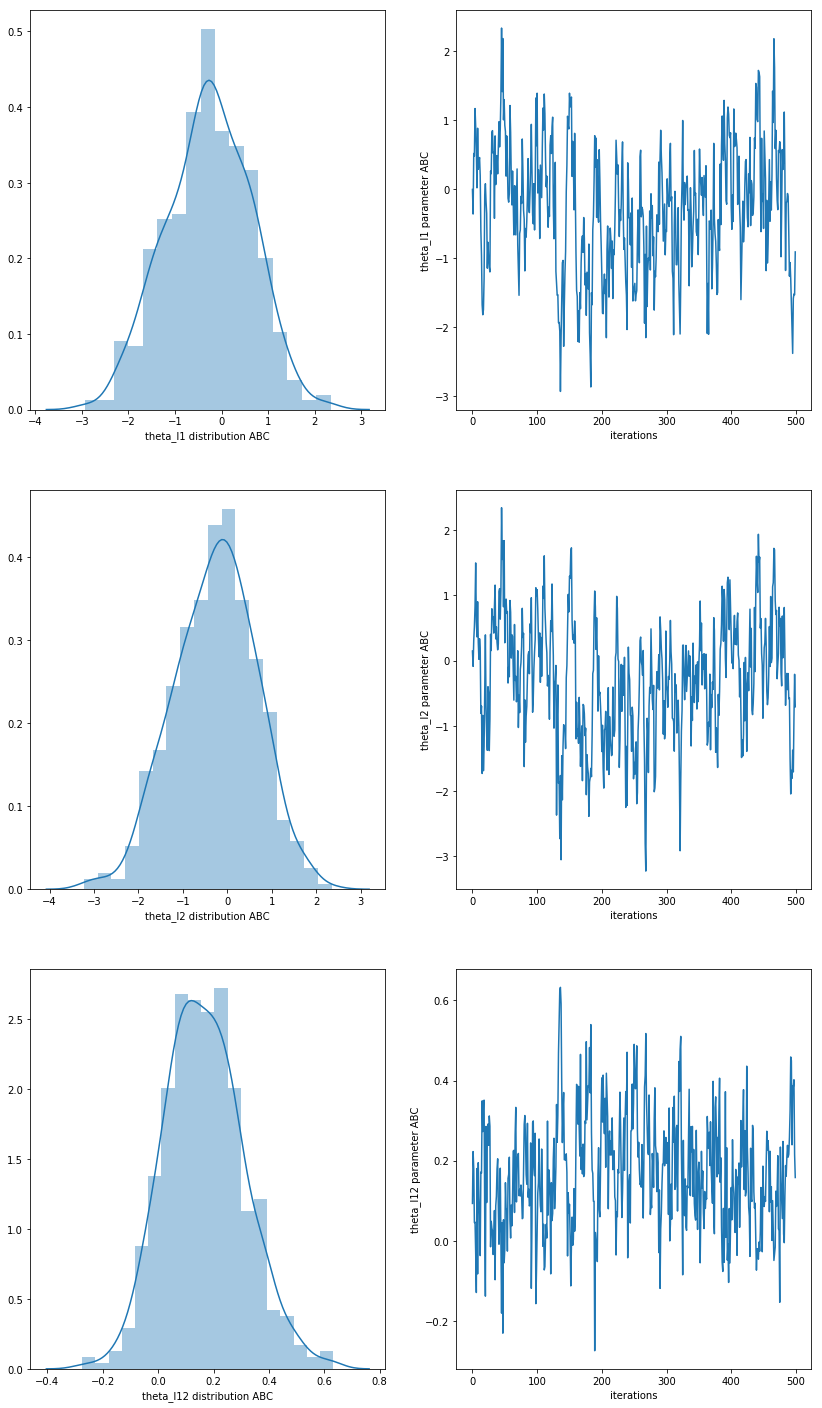

In [19]:
plot_marginals(data4, burn_in=10, by=100)

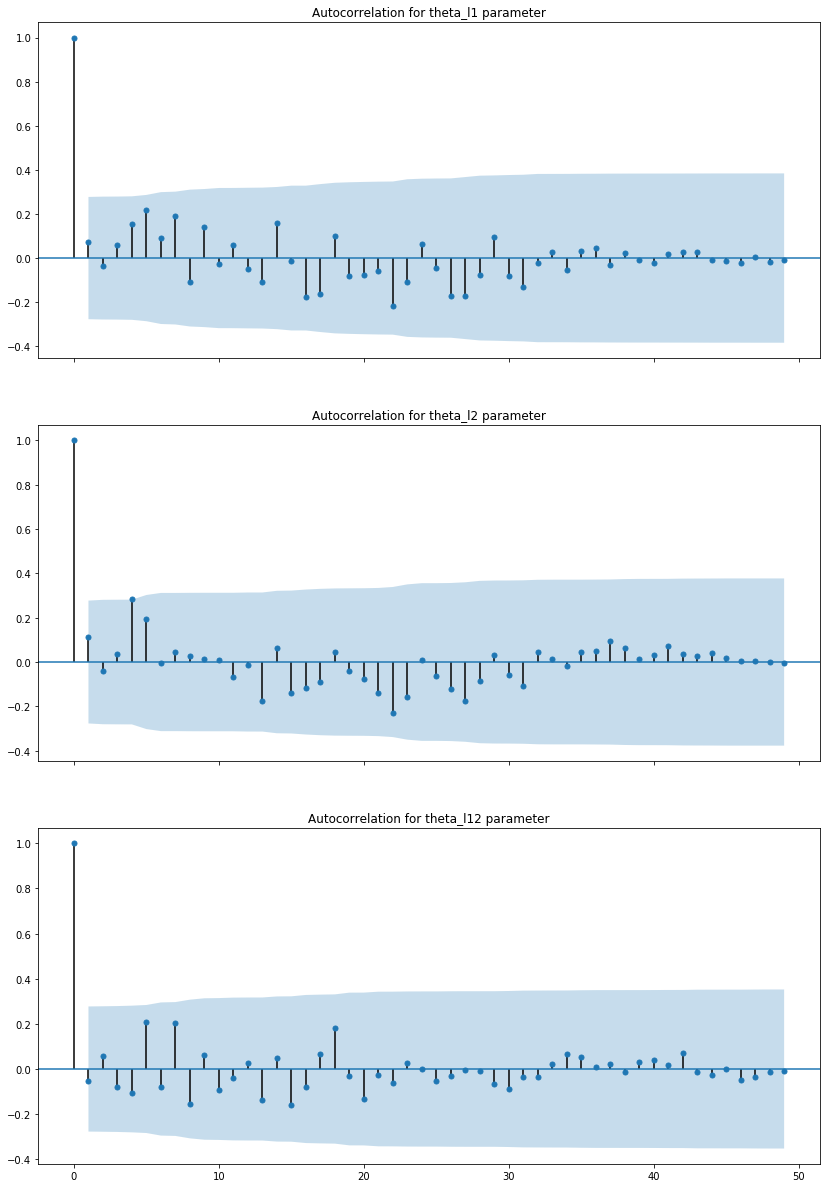

In [20]:
autocor(data4, burn_in=10, by=1000)

### Experimentation #5
* sample size : $size=10$ nodes (for a complete graph)
* $\theta_0 = [0, 0, 0]$
* $y \sim  Metropolis\_Hasting(\theta_0, iter=1000)$
* $\Delta=[0.05,0.05, 0.05]$
* Number of samples: $n=100000$
* Shadow chain length: $n_{shadow} = 100$

In [3]:
FILE_NAME_5 = 'assets/exp5.json'
data5 = extract_from_file(FILE_NAME_5)

In [4]:
summary(data5)

========== Q25 ==========
Q25 for theta_l1 parameter -0.9524270586466619
Q25 for theta_l2 parameter -0.9693167552854864
Q25 for theta_l12 parameter -0.019262511165431817
========== Q50 ==========
Q50 for theta_l1 parameter -0.419914852662437
Q50 for theta_l2 parameter -0.40383110783958176
Q50 for theta_l12 parameter 0.07263749430699698
========== Q75 ==========
Q75 for theta_l1 parameter 0.06145678786979015
Q75 for theta_l2 parameter 0.0878850350929899
Q75 for theta_l12 parameter 0.17259019348824234


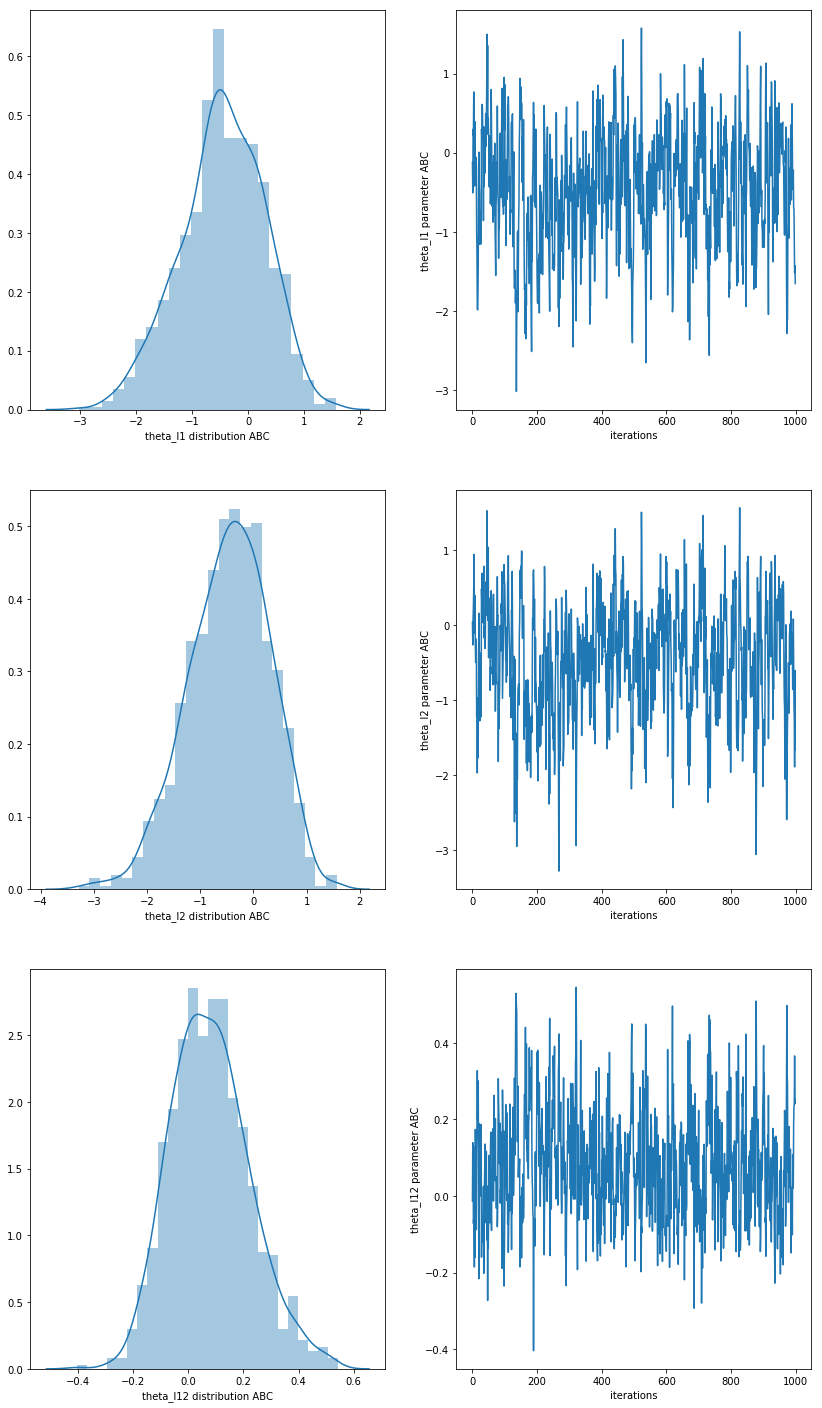

In [10]:
plot_marginals(data5, burn_in=10, by=100)

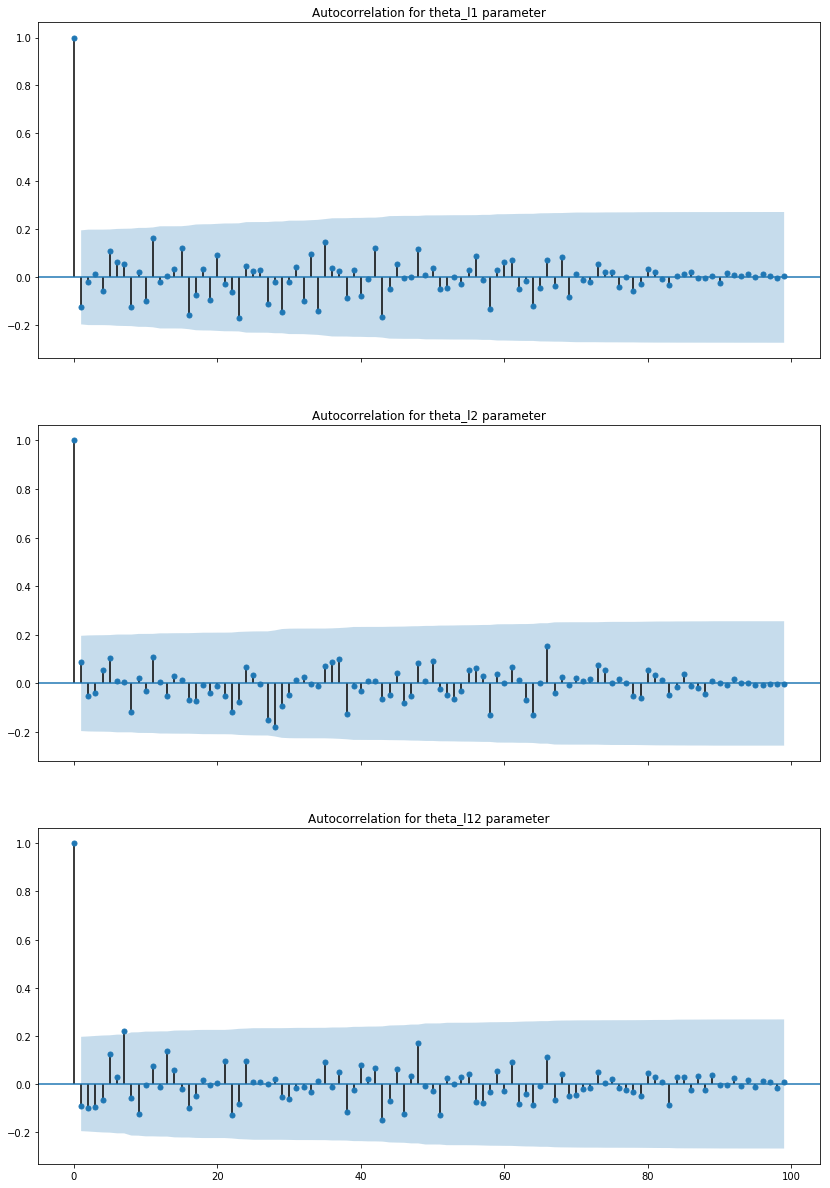

In [12]:
autocor(data5, by=1000)

### Experimentation #6
* sample size : $size=10$ nodes (for a complete graph)
* $\theta_0 = [0, 0, 0]$
* $y \sim  Metropolis\_Hasting(\theta_0, iter=1000)$
* $\Delta=[0.05,0.05, 0.05]$
* Number of samples: $n=100000$
* Shadow chain length: $n_{shadow} = 100$

In [4]:
FILE_NAME_6 = 'assets/exp6.json'
data6 = extract_from_file(FILE_NAME_6)

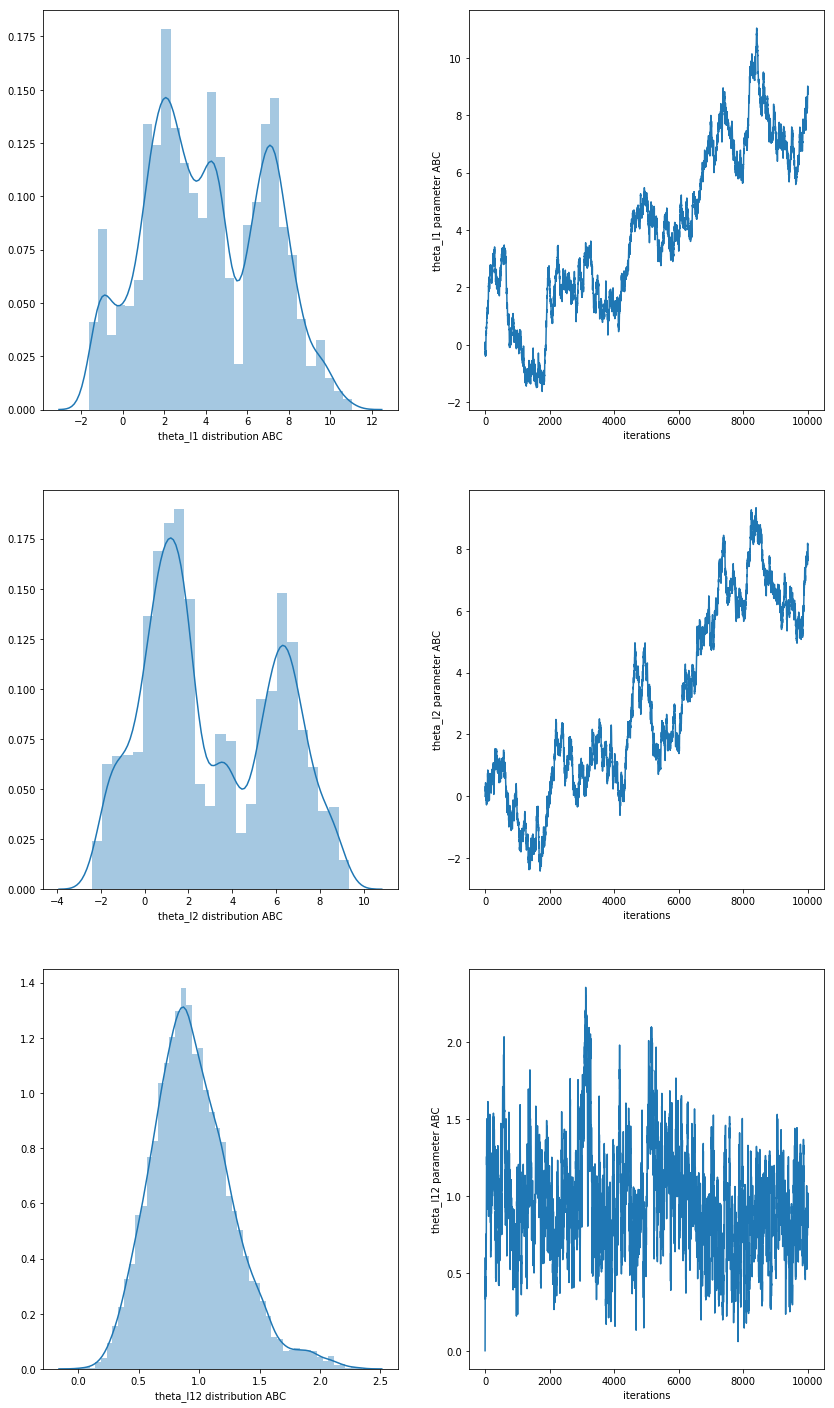

In [10]:
plot_marginals(data6)
plt.savefig('exp6.pdf')

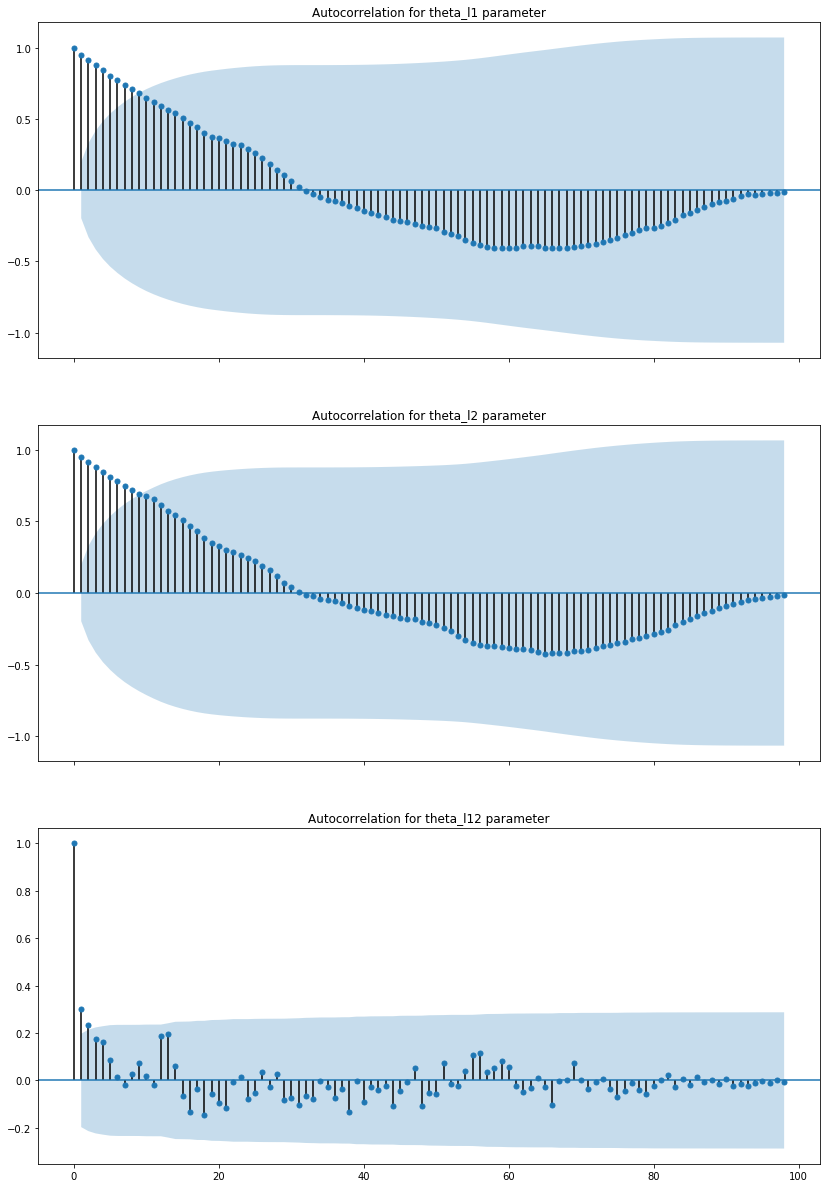

In [9]:
autocor(data6, burn_in=100, by=100)

### Experimentation #7
* sample size : $size=10$ nodes (for a complete graph)
* $\theta_0 = [0, 0, 0]$
* $y \sim  Metropolis\_Hasting(\theta_0, iter=1000)$
* $\Delta=[0.05,0.05, 0.05]$
* Number of samples: $n=100000$
* Shadow chain length: $n_{shadow} = 100$

In [8]:
FILE_NAME_7 = 'assets/exp7.json'
data7 = extract_from_file(FILE_NAME_7)

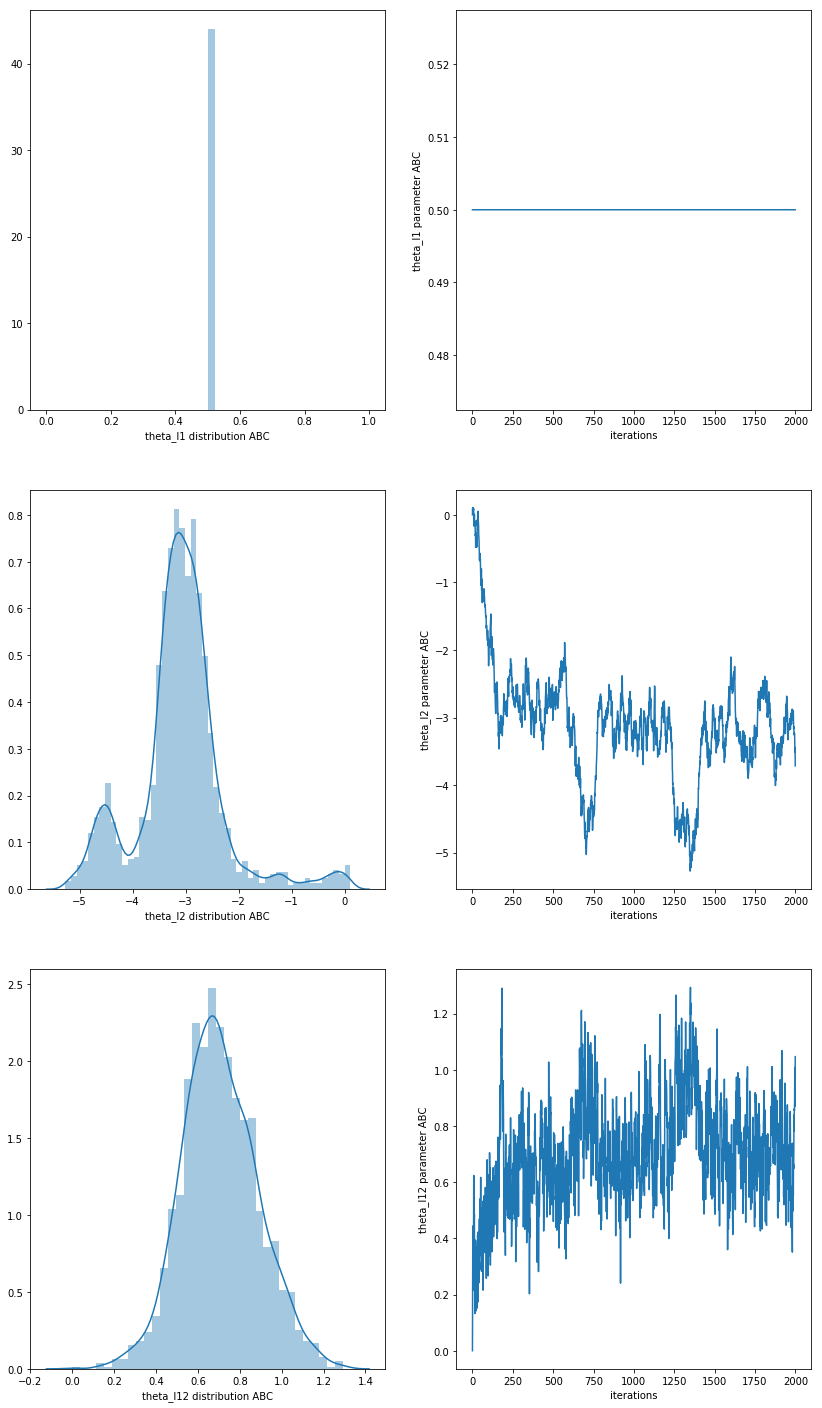

In [11]:
plot_marginals(data7)
plt.savefig('exp7.pdf')